In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MyKMeans:
    def __init__(self, n_clusters=3, max_iters=100, tolerance=1e-4):
        self.n_clusters = n_clusters  # 指定聚类的数量
        self.max_iters = max_iters  # 最大迭代次数
        self.tolerance = tolerance  # 收敛容忍度
        self.centroids = None  # 存储质心

    def fit(self, X):
        # 随机选择初始质心
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # 1. 分配每个点到最近的质心
            labels = self._assign_clusters(X)

            # 2. 计算新的质心
            new_centroids = self._calculate_centroids(X, labels)

            # 3. 检查收敛
            if self._converged(new_centroids):
                break

            self.centroids = new_centroids  # 更新质心

    def _assign_clusters(self, X):
        # 计算每个点到每个质心的距离
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)  # 返回每个点的最近质心的索引

    def _calculate_centroids(self, X, labels):
        # 计算每个簇的新的质心
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def _converged(self, new_centroids):
        # 检查质心是否收敛
        shift = np.linalg.norm(new_centroids - self.centroids)
        return shift < self.tolerance

    def predict(self, X):
        # 预测每个点的簇标签
        return self._assign_clusters(X)

    def plot_clusters(self, X, labels):
        # 可视化聚类结果
        plt.figure(figsize=(8, 6))
        for i in range(self.n_clusters):
            # 绘制每个簇的数据点
            plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i}')
        
        # 绘制质心
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
        
        plt.title('KMeans Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()

Centroids:
[[5.06447338 5.00042288]
 [1.93216218 1.9639913 ]
 [7.95227356 8.07003103]]
Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


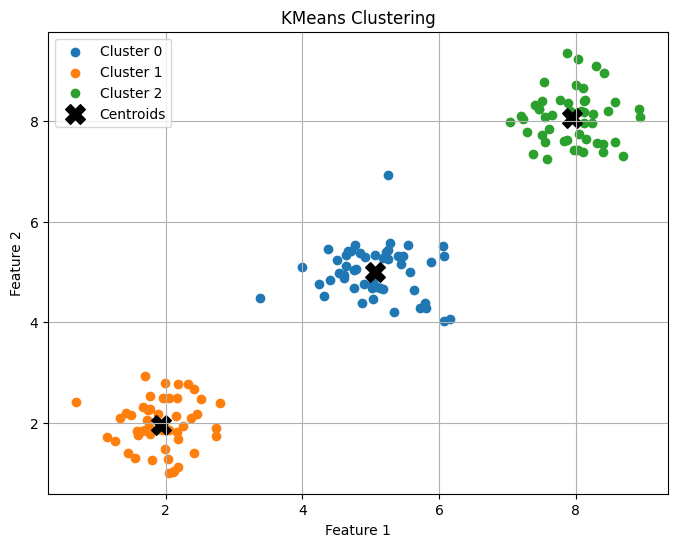

In [2]:
# 使用自定义的 KMeans 实现
if __name__ == "__main__":
    # 生成一些随机数据
    np.random.seed(42)
    data = np.vstack([
        np.random.normal([2, 2], 0.5, size=(50, 2)),
        np.random.normal([8, 8], 0.5, size=(50, 2)),
        np.random.normal([5, 5], 0.5, size=(50, 2))
    ])

    # 创建 KMeans 实例并训练模型
    kmeans = MyKMeans(n_clusters=3)
    kmeans.fit(data)

    # 打印质心和每个点的标签
    print("Centroids:")
    print(kmeans.centroids)

    labels = kmeans.predict(data)
    print("Labels:")
    print(labels)

    # 可视化聚类结果
    kmeans.plot_clusters(data, labels)
